<a href="https://colab.research.google.com/github/thiagoteles10/analise_de_doencas_cardiovasculares/blob/main/cardiopatia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import numpy as np
from scipy.stats import norm

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# avaliando o modelo
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

# IMPORTANDO O MODELO RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore') # filtro de warnings


In [2]:
df=pd.read_csv("/content/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Verificando a distribuição das variáveis

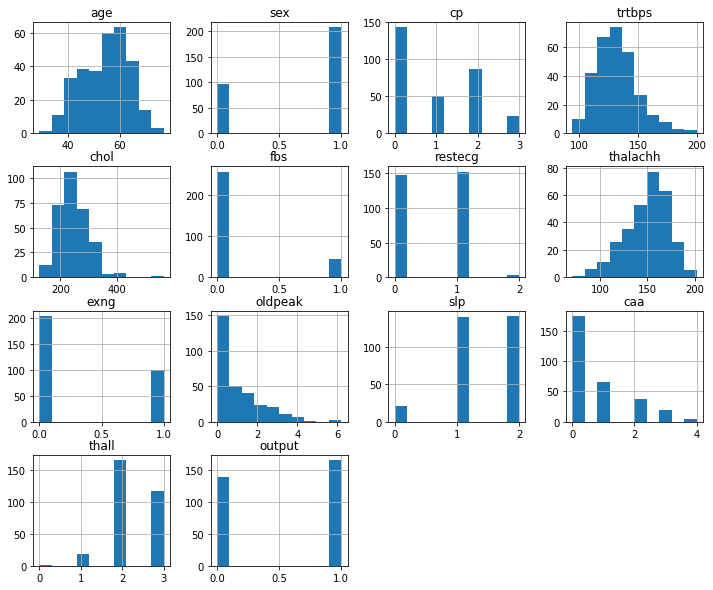

In [4]:
df.hist(figsize=(12,10))
plt.show()

### Renomeando a coluna output

In [5]:
df.rename(columns={'output': 'target'}, inplace=True)

In [6]:
linhas,colunas = df.shape

### Verificando se há valores duplicados

In [7]:
 df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
repetidas = df[df.duplicated()]

In [9]:
print(f'o número de valores repetidos no df é: {len(repetidas)}')

o número de valores repetidos no df é: 1


Excluindo as linhas duplicadas

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape


(302, 14)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [14]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### verificação da distribuição da idade

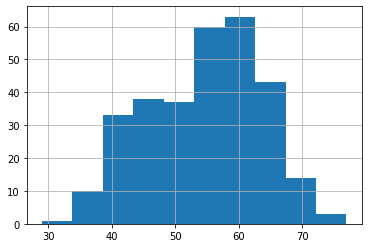

In [15]:
df['age'].hist();

### Distribuição das pessoas por idade e sexo

In [16]:
pd.crosstab(df.age, df.sex)

sex,0,1
age,,
29,0,1
34,1,1
35,1,3
37,1,1
38,0,2
39,2,2
40,0,3
41,4,6
42,2,6


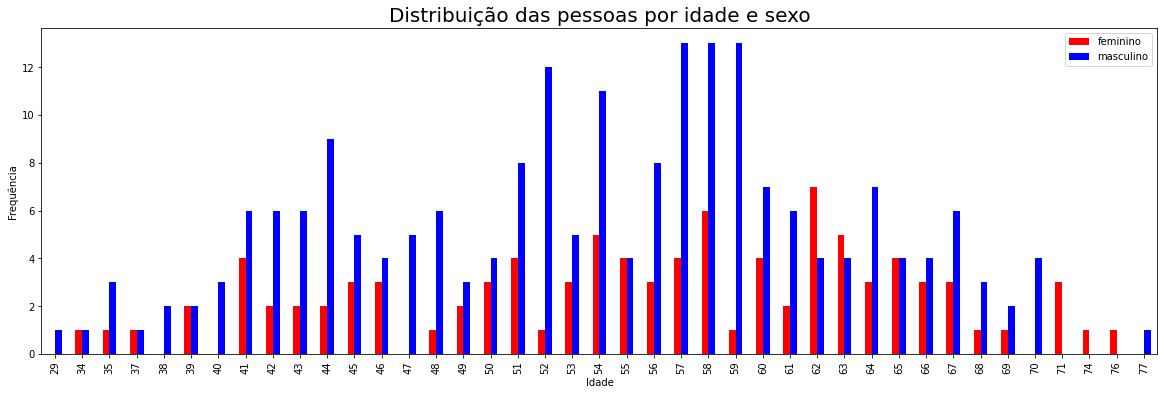

In [17]:
from matplotlib import colors
pd.crosstab(df.age, df.sex).plot(kind="bar", figsize=(20, 6),color=['red','blue'])
plt.title("Distribuição das pessoas por idade e sexo",fontsize=20,)
plt.xlabel("Idade")
plt.legend(['feminino','masculino'])
plt.ylabel("Frequência")
plt.show()

In [18]:
x_list = np.linspace(df['age'].min(),df['age'].max(), 100)

In [19]:
x_list

array([29.        , 29.48484848, 29.96969697, 30.45454545, 30.93939394,
       31.42424242, 31.90909091, 32.39393939, 32.87878788, 33.36363636,
       33.84848485, 34.33333333, 34.81818182, 35.3030303 , 35.78787879,
       36.27272727, 36.75757576, 37.24242424, 37.72727273, 38.21212121,
       38.6969697 , 39.18181818, 39.66666667, 40.15151515, 40.63636364,
       41.12121212, 41.60606061, 42.09090909, 42.57575758, 43.06060606,
       43.54545455, 44.03030303, 44.51515152, 45.        , 45.48484848,
       45.96969697, 46.45454545, 46.93939394, 47.42424242, 47.90909091,
       48.39393939, 48.87878788, 49.36363636, 49.84848485, 50.33333333,
       50.81818182, 51.3030303 , 51.78787879, 52.27272727, 52.75757576,
       53.24242424, 53.72727273, 54.21212121, 54.6969697 , 55.18181818,
       55.66666667, 56.15151515, 56.63636364, 57.12121212, 57.60606061,
       58.09090909, 58.57575758, 59.06060606, 59.54545455, 60.03030303,
       60.51515152, 61.        , 61.48484848, 61.96969697, 62.45

In [20]:
y_list = norm.pdf(x_list, loc=df['age'].mean(), scale=df['age'].std())

In [21]:
y_list

array([0.00085176, 0.00098873, 0.00114444, 0.00132087, 0.00152012,
       0.00174442, 0.00199607, 0.00227748, 0.0025911 , 0.00293947,
       0.00332511, 0.00375055, 0.00421831, 0.00473079, 0.00529033,
       0.00589908, 0.00655901, 0.00727187, 0.00803908, 0.00886175,
       0.0097406 , 0.0106759 , 0.01166747, 0.01271456, 0.0138159 ,
       0.01496959, 0.01617311, 0.01742329, 0.01871629, 0.02004759,
       0.02141201, 0.02280372, 0.02421625, 0.02564254, 0.02707497,
       0.02850545, 0.02992546, 0.03132612, 0.03269831, 0.03403274,
       0.03532006, 0.03655097, 0.03771632, 0.03880722, 0.03981519,
       0.04073221, 0.04155086, 0.04226443, 0.04286698, 0.04335346,
       0.04371973, 0.04396268, 0.04408022, 0.04407134, 0.04393612,
       0.04367571, 0.04329236, 0.04278933, 0.04217087, 0.04144218,
       0.04060931, 0.03967907, 0.03865897, 0.03755709, 0.036382  ,
       0.03514262, 0.03384812, 0.03250783, 0.03113109, 0.02972717,
       0.02830517, 0.02687391, 0.02544186, 0.02401705, 0.02260

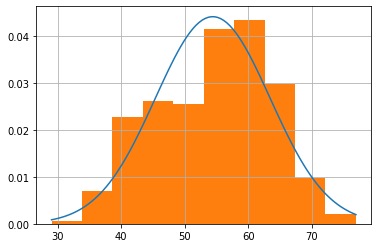

In [22]:
plt.plot(x_list,y_list)
df['age'].hist(density=True, figsize=(6,4));

### Existem dados faltantes

In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

Podemos ver que não existem dados faltantes

## Quantas pessoas tem problemas cardíacos?
### 1- significa que a pessoa tem problema cardíaco
### 0- significa que a pessoa não tem problema cardíaco

In [116]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

### Número de pessoas com problemas cardíacos.

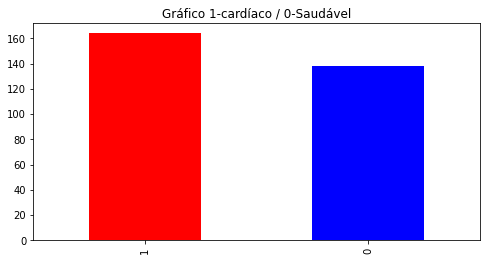

In [126]:
plt.figure(figsize=(8,4))
df['target'].value_counts().plot(kind='bar', color=['red','blue']);
plt.title('Gráfico 1-cardíaco / 0-Saudável');



In [26]:
cardiacos = df['target'].value_counts()
print(f'De um total de {len(df)} pessoas examinadas, {cardiacos[1]} tem problemas cardíacos')

De um total de 302 pessoas examinadas, 164 tem problemas cardíacos


### Quantidade de pessoas do sexo masculino e feminino do dataset

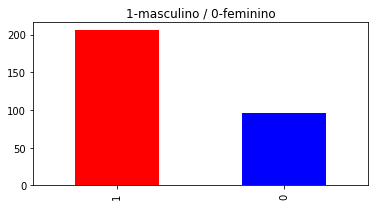

In [27]:
df['sex'].value_counts().plot(kind='bar', color=['red','blue'], figsize=(6,3));
plt.title('1-masculino / 0-feminino');

In [28]:
qtd = df['sex'].value_counts()

In [29]:
qtd

1    206
0     96
Name: sex, dtype: int64

In [30]:
print(f'A quantidade de Homens é: {qtd[1]}')

A quantidade de Homens é: 206


In [31]:
print(f'A quantidade de Mulheres é: {qtd[0]}')

A quantidade de Mulheres é: 96


### Número de problemas cardíacos por sexo

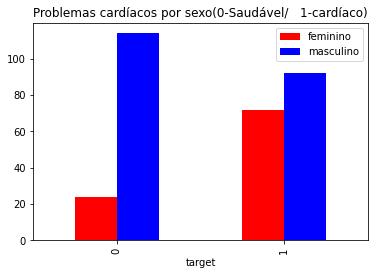

In [127]:

pd.crosstab(df['target'],df['sex']).plot(kind='bar', color=['red','blue']);
plt.title('Problemas cardíacos por sexo(0-Saudável/   1-cardíaco)');
plt.legend(['feminino','masculino']);


In [33]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,92


In [34]:
df1 = pd.crosstab(df['target'],df['sex'])

In [35]:
print(f'De um total de {qtd[0]} mulheres examinadas, {df1[0][1]} tem problemas cardíacos')

De um total de 96 mulheres examinadas, 72 tem problemas cardíacos


In [128]:
print(f'De um total de {qtd[1]} homens examinados, {df1[1][1]} tem problemas cardíacos')

De um total de 206 homens examinados, 92 tem problemas cardíacos


### Número de problemas cardíacos por idade

In [37]:
pd.crosstab(df['age'],df['target']).sum()

target
0    138
1    164
dtype: int64

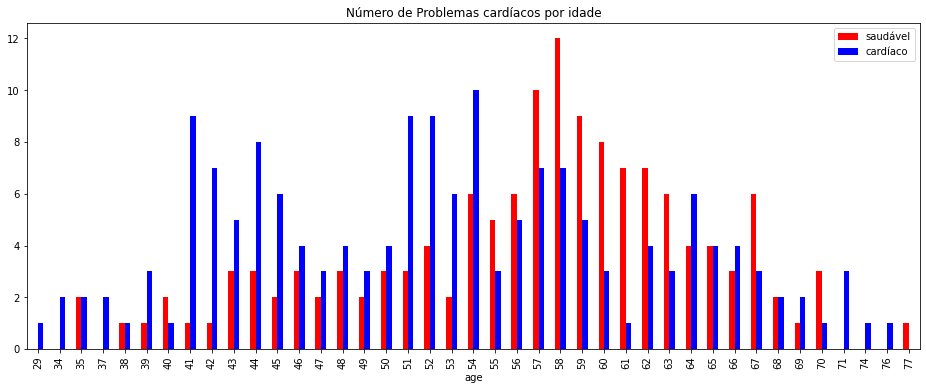

In [38]:
pd.crosstab(df['age'],df['target']).plot(kind='bar', color=['red','blue'],figsize=(16,6));
plt.title('Número de Problemas cardíacos por idade');
plt.legend(['saudável','cardíaco']);

### cp tipo de dor toráxica

0.   angina típica (presença das características típicas)
1.   angina atípica(presença de 2 características típicas)
2.   provavelmente não anginosa (presença de uma característica típica)
3.   assintomática(nenhuma característica típica)





In [39]:
df['cp'].unique()

array([3, 2, 1, 0])

In [40]:
pd.crosstab(df['target'],df['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,68,16


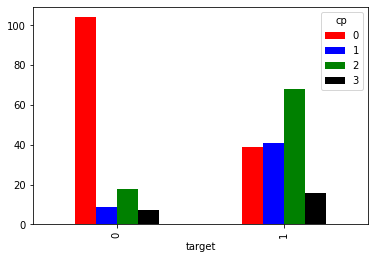

In [41]:
pd.crosstab(df['target'],df['cp']).plot(kind='bar', color=['red','blue','green','black']);

podemos ver que os pacientes cardíacos apresentam uma dor toráxica de nível 2 mais acentuada

### Trtbps-> pressão arterial em repouso

In [42]:
df['trtbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

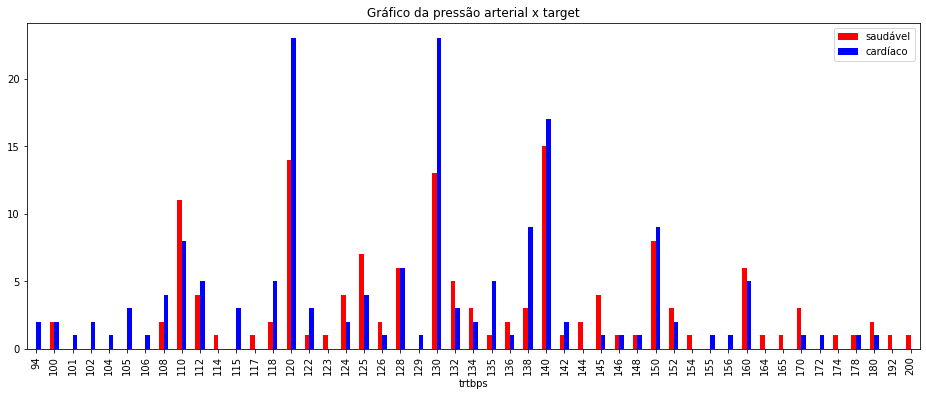

In [43]:
pd.crosstab(df['trtbps'],df['target']).plot(kind='bar', color=['red','blue'],figsize=(16,6));
plt.title('Gráfico da pressão arterial x target');
plt.legend(['saudável','cardíaco'])

In [44]:
df['trtbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trtbps, dtype: int64

In [45]:
df['trtbps'].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

### Pegando os valores da pressão arterial que estão acima de 130

In [46]:
df_trtbps_acima_130 = df[df['trtbps'] >= 130]

In [47]:
df_trtbps_acima_130.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [48]:
pd.crosstab(df_trtbps_acima_130['target'], df_trtbps_acima_130['trtbps'])

trtbps,130,132,134,135,136,138,140,142,144,145,...,160,164,165,170,172,174,178,180,192,200
target,,,,,,,,,,,,,,,,,,,,,
0,13,5,3,1,2,3,15,1,2,4,...,6,1,1,3,0,1,1,2,1,1
1,23,3,2,5,1,9,17,2,0,1,...,5,0,0,1,1,0,1,1,0,0


In [49]:
df_trtbps_abaixo_130 = df[df['trtbps'] < 130]

In [50]:
pd.crosstab(df_trtbps_abaixo_130['target'], df_trtbps_abaixo_130['trtbps'])

trtbps,94,100,101,102,104,105,106,108,110,112,...,117,118,120,122,123,124,125,126,128,129
target,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,0,0,0,0,2,11,4,...,1,2,14,1,1,4,7,2,6,0
1,2,2,1,2,1,3,1,4,8,5,...,0,5,23,3,0,2,4,1,6,1


### chol-> colesterol sérico 

*   Menor que 200mg/dl NORMAL
*   Maior ou igual a 200mg/dl ALTO



In [51]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [52]:
df['chol'].nunique()

152

In [53]:
df['chol'].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

Text(0, 0.5, 'Níveis de Colesterol')

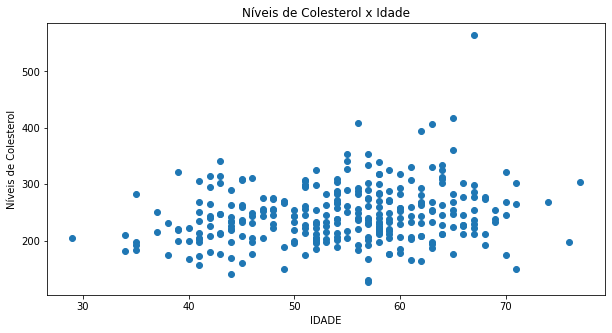

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(df['age'],df['chol'],)
plt.title('Níveis de Colesterol x Idade')
plt.xlabel('IDADE')
plt.ylabel('Níveis de Colesterol')

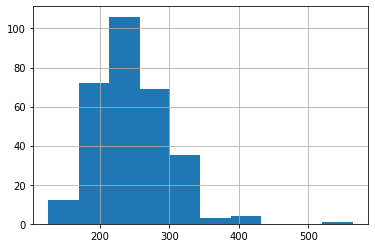

In [55]:
df['chol'].hist();

### Tentando encontrar uma correlação evidente

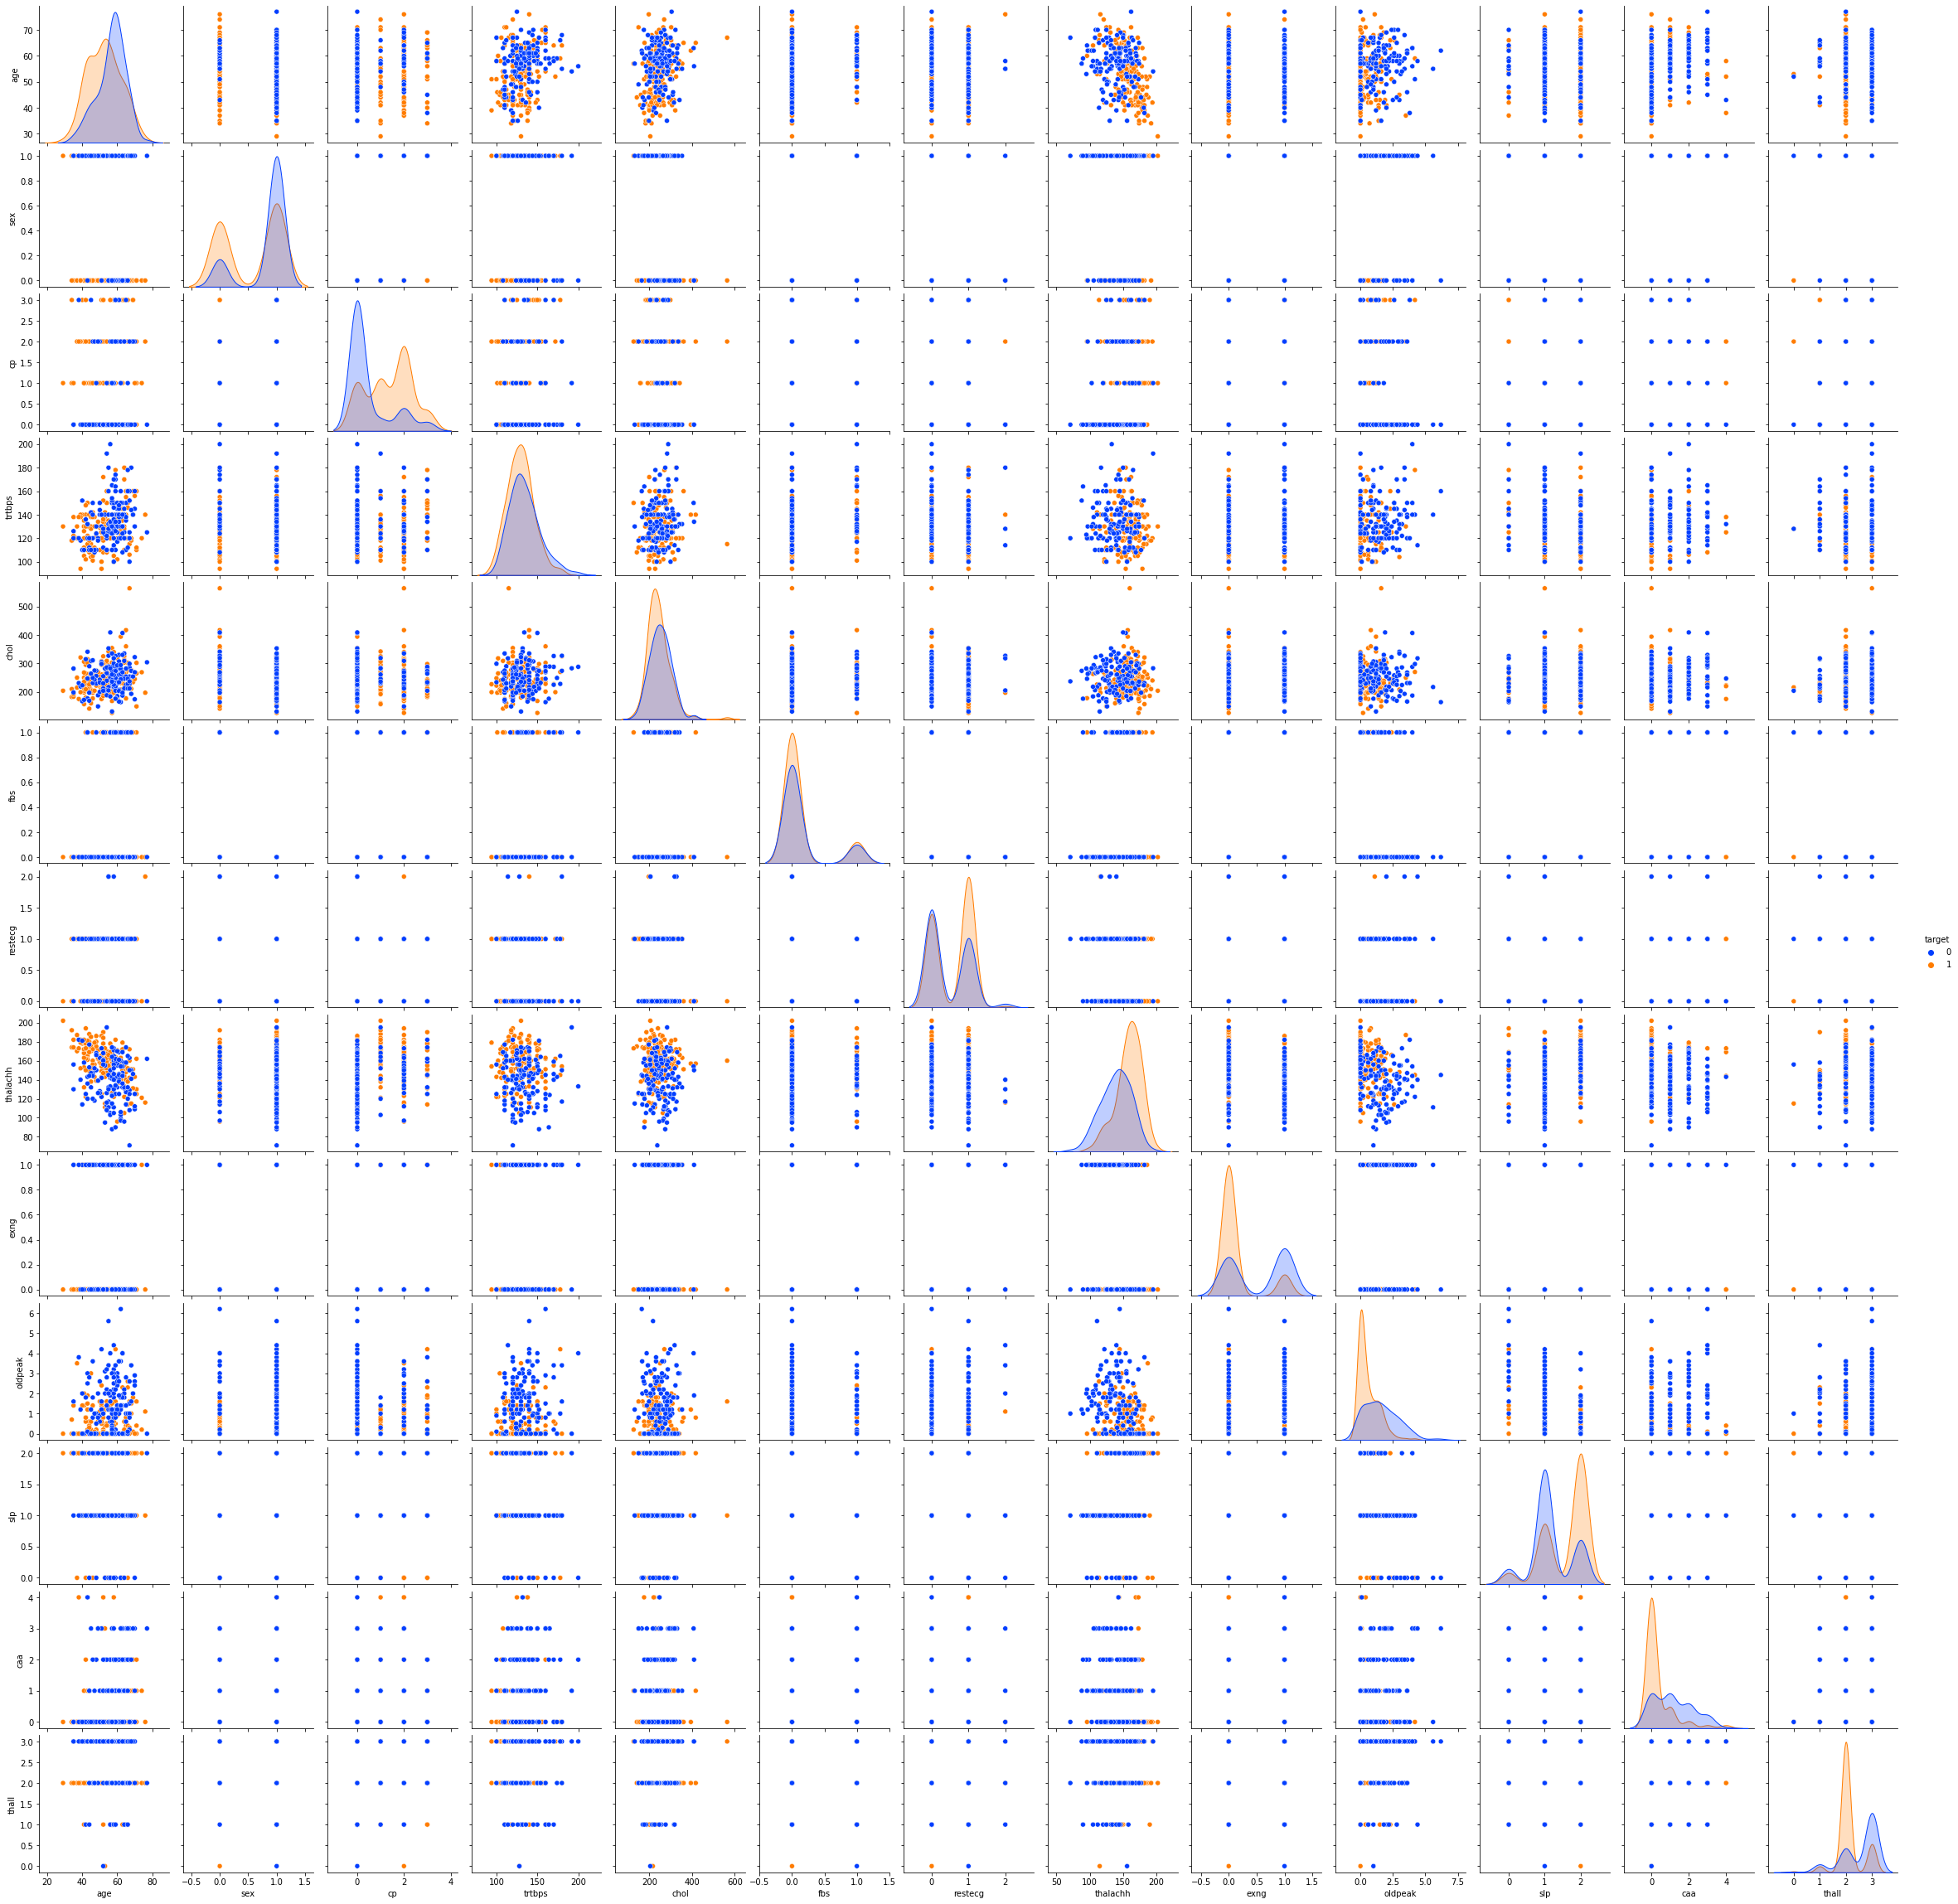

In [56]:
sns.pairplot(data=df,hue="target",palette="bright")

### criando novos valores para coluna chol onde se o valor de x for maior que 200 substitua por 1 senão substitua por 0 (0- colesterol normal / 1-colesterol alto)

In [57]:
# uma nova coluna terá 1 se chol maior que 200 e 0 se chol menor que 200
df['ev_chol'] = df['chol'].apply(lambda x: 1 if x > 200 else 0)

In [58]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target,ev_chol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [59]:
#pegando a quantidade de pessoas com colesterol alto
df['ev_chol'].value_counts()

1    252
0     50
Name: ev_chol, dtype: int64

In [61]:
# pegando os valores da coluna chol maior ou igual a 200
df_chol_acima_200 = df[df['chol'] >= 200]

In [62]:
df_chol_acima_200.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target,ev_chol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [63]:
pd.crosstab(df_chol_acima_200['target'], df_chol_acima_200['chol'])

chol,200,201,203,204,205,206,207,208,209,210,...,341,342,353,354,360,394,407,409,417,564
target,,,,,,,,,,,,,,,,,,,,,
0,1,0,2,2,1,2,1,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1,0,3,1,4,1,0,1,2,2,1,...,0,1,0,1,1,1,0,0,1,1


In [64]:
# pegando os valores da coluna chol menor ou igual a 200
df_chol_menor_200 = df[df['chol'] < 200]

In [65]:
pd.crosstab(df_chol_menor_200['target'],df_chol_menor_200['chol'])

chol,126,131,141,149,157,160,164,166,167,168,...,186,187,188,192,193,195,196,197,198,199
target,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,0,1,1,1,0,...,0,1,2,0,1,0,0,2,1,0
1,1,0,1,1,1,1,0,0,0,1,...,1,0,0,2,1,1,2,4,1,3


### fbs -> significa açucar no sangue em jejum
1. se o valor do fbs for maior que 120mg/dl temos 1 senão temos 0
2. acima de 126 sinais de diabetes

In [66]:
df['fbs'].unique()

array([1, 0])

In [67]:
df['fbs'].value_counts()

0    257
1     45
Name: fbs, dtype: int64

In [68]:
pd.crosstab(df['target'],df['fbs'])

fbs,0,1
target,,
0,116,22
1,141,23


### restecg -> resultado eletrocardiograma em repouso
 

*   0- Normal
*   1- anormalidade de ST-T(inversão da onda T e elevação ou depressão de >0.05mV)
*   2-Hipertrofia ventricular esquerda provável ou definitiva.




In [69]:
df['restecg'].unique()

array([0, 1, 2])

In [70]:
df['restecg'].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

In [71]:
pd.crosstab(df['target'], df['restecg'])

restecg,0,1,2
target,,,
0,79,56,3
1,68,95,1


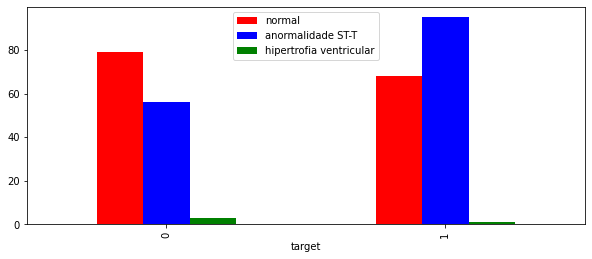

In [72]:

pd.crosstab(df['target'], df['restecg']).plot(kind='bar', color=['red','blue','green'],figsize=(10,4));
plt.legend(['normal','anormalidade ST-T','hipertrofia ventricular'])

Vemos que a anormalidade de ST-T fica bem mais característica em pacientes cardíacos.

### "thalach" -> frequência cardíaca máxima alcançada.

In [73]:
df['thalachh'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

In [74]:
df['thalachh'].describe()

count    302.000000
mean     149.569536
std       22.903527
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

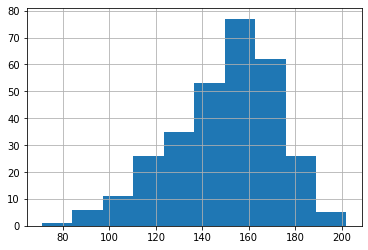

In [135]:
df['thalachh'].hist();

### "exng" -> Angina induzida por exercício

*  0 - Não
*  1 - Sim

In [76]:
df['exng'].unique()

array([0, 1])

In [77]:
df['exng'].value_counts()

0    203
1     99
Name: exng, dtype: int64

In [78]:
pd.crosstab(df['exng'],df['target'])

target,0,1
exng,,
0,62,141
1,76,23


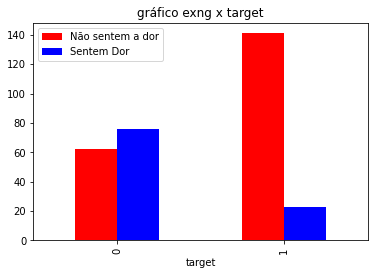

In [137]:
pd.crosstab(df['target'],df['exng']).plot(kind='bar', color=['red','blue']);
plt.legend(["Não sentem a dor", "Sentem Dor"]);
plt.title('gráfico exng x target');

### "oldpeak" -> Queda de ST induzida por exercício em relação ao repouso

*  Olha para o estresse do coração durante o exercício
*  Coração doente irá estressar mais

In [80]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [81]:
df['oldpeak'].nunique()

40

In [82]:
df['oldpeak'].describe()

count    302.000000
mean       1.043046
std        1.161452
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

### "slp" -> inclinição do segmento ST de pico de exercício

* 0: Upslopin: melhor frequência cardíca com exercício
* 1: Flatsloping: mudança mínima(coração saudável típico)
* 2: downslopins: sinais de coração doentio

In [83]:
df['slp'].unique()

array([0, 2, 1])

In [84]:
df['slp'].value_counts()

2    141
1    140
0     21
Name: slp, dtype: int64

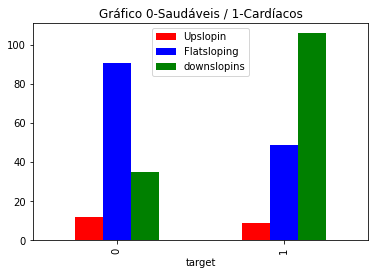

In [144]:
pd.crosstab(df['target'],df['slp']).plot(kind='bar', color=['red','blue','green']);
plt.legend(['Upslopin','Flatsloping','downslopins']);
plt.title('Gráfico 0-Saudáveis / 1-Cardíacos');

Vemos que em pacientes cardíacos, a inclinação do segmento st de pico de exercício nível 2(downslopins: sinais de coração doentio) é bem mais acentuado.

In [86]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target,ev_chol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


### "caa" -> número de vasos principais(0-4) coloridos por flurosopia

vaso colorido significa que o médico pode ver o sangue passando
quanto mais circulação sanguínea, melhor(sem coágulos)

In [87]:
df['caa'].unique()

array([0, 2, 1, 3, 4])

In [88]:
df['caa'].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64

In [89]:
pd.crosstab(df['target'],df['caa'])

caa,0,1,2,3,4
target,,,,,
0,45,44,31,17,1
1,130,21,7,3,3


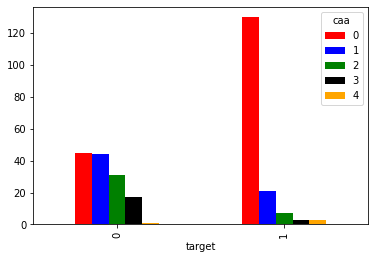

In [90]:
pd.crosstab(df['target'],df['caa']).plot(kind='bar', color=['red','blue','green','black','orange']);

### "thall" -> teste de esforço cardíaco

* 1-3: normal
* 6: defeito corrigido: costumava ser defeito, mas agora está bem
* 7: defeito reversível: nenhum movimento sanguíneo adequado durante o exercício.

In [91]:
df['thall'].unique()

array([1, 2, 3, 0])

In [92]:
df['thall'].value_counts()

2    165
3    117
1     18
0      2
Name: thall, dtype: int64

In [93]:
pd.crosstab(df['target'],df['thall'])

thall,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,129,28


### Doença cardíaca em função da idade e frequência cardíaca máxima(thalac)

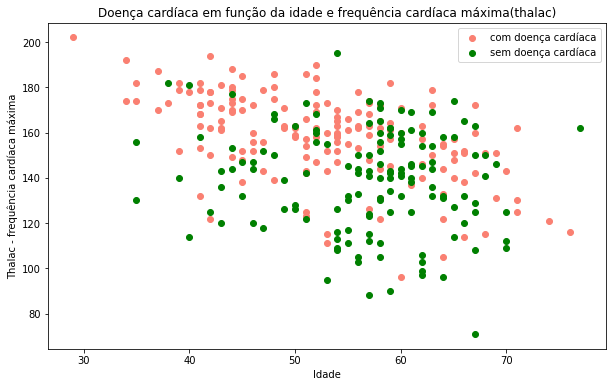

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalachh[df.target ==1], c='salmon')
plt.scatter(df.age[df.target==0], df.thalachh[df.target ==0], c='green')

plt.title('Doença cardíaca em função da idade e frequência cardíaca máxima(thalac)')
plt.xlabel('Idade')
plt.ylabel('Thalac - frequência cardíaca máxima')
plt.legend(['com doença cardíaca', 'sem doença cardíaca'])

### Correlação entre as variáveis

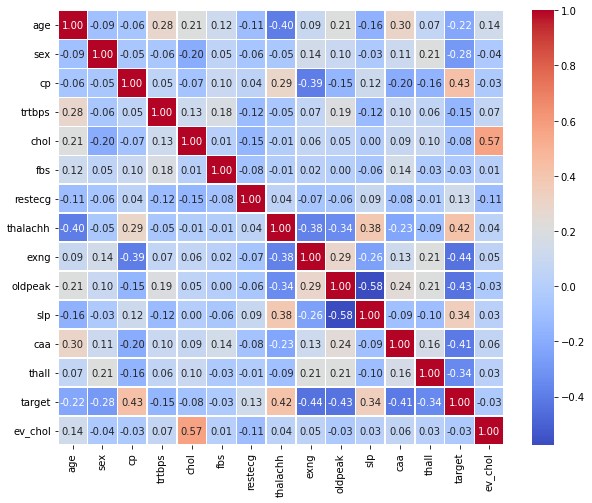

In [95]:
cor_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, linewidths=0.5,fmt='.2f',cmap='coolwarm')

### Machine learning( Regressão logística)

In [154]:
# DETERMINANDO O X E Y
X = df.drop('target', axis=1)

In [155]:
y = df['target']

In [156]:
# DIVIDIR O DATASET ENTRE TREINO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [157]:
#CRIANDO O MODELO
maquina_preditiva = LogisticRegression() # C=0.01 ajuda a máquina a ter uma melhor assertividade.

# agora vamos treinar a máquina preditiva
maquina_preditiva.fit(X_train, y_train)

LogisticRegression()

In [158]:
# MEDINDO A ACURÁCIA DO TESTE
resultado = maquina_preditiva.score(X_test,y_test)
print(f'a acurácia nos resultados dos testes é {(resultado*100).round(2)}%')

a acurácia nos resultados dos testes é 86.84%


In [159]:
# mostrando os 7 primeiros valores previstos pela máquina
# 0- NÃO tem problema cardíaco   1- TEM problema cardíaco.

pred = maquina_preditiva.predict(X_test)
print(pred[:7])

[0 0 0 1 1 1 1]


In [160]:
# aqui é dado a probabilidade entre 0 e 1 para o paciente ser cardíaco ou não.
pred_proba = maquina_preditiva.predict_proba(X_test)
print(pred_proba[:7])

[[0.51832984 0.48167016]
 [0.88392673 0.11607327]
 [0.84753678 0.15246322]
 [0.09287364 0.90712636]
 [0.13162636 0.86837364]
 [0.26665965 0.73334035]
 [0.11424229 0.88575771]]


In [161]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.85      0.93      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76



Descrição das métricas

* Precision - Precisão de previsões positivas..
* Reacall - Fração de positivos que foram identificados corretamente.
* f1-score- representa a média harmonica entre precision e recall, sendo 0 o pior valor e 1 o melhor.

Text(24.0, 0.5, 'True label')

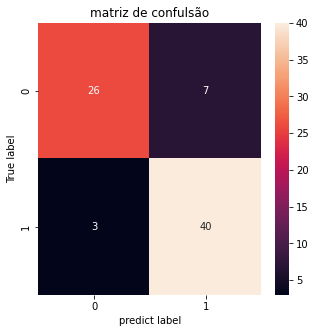

In [162]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,pred), annot=True)
plt.title('matriz de confulsão')
plt.xlabel('predict label')
plt.ylabel('True label')

### Comparando o resultado do modelo atual com o resultado previsto pela máquina

In [163]:
atual_vs_predict = pd.DataFrame({'atual': y_test, 'previsto': pred})

In [164]:
atual_vs_predict.head(10)

,atual,previsto
270,0,0
247,0,0
168,0,0
157,1,1
228,0,1
43,1,1
132,1,1
153,1,1
46,1,1
246,0,0


## Machine learning( Random forest)

In [165]:
X = df.drop('target', axis=1)

In [166]:
y = df['target']

In [167]:
# DIVIDIR O DATASET ENTRE TREINO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Criando a máquina preditiva

In [168]:
# criando a máquina preditiva ( chamando o algoritmo a ser usado)
maq_RF = RandomForestClassifier(n_estimators=1000)

In [169]:
# treinando o algoritmo com os dados do treino
maq_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

### Avaliando a acurácia do modelo de machine learning(Random forest)

In [170]:
acuracia = maq_RF.score(X_test,y_test)
acuracia = (acuracia * 100).round(2)

print(f'A acurácia do modelo foi de : {acuracia}%')

A acurácia do modelo foi de : 82.89%


### Verificando a importância das variáveis

In [171]:
# Importância das variáveis dentro do modelo de machine learning
variaveis_importantes = maq_RF.feature_importances_
print(variaveis_importantes)

[0.08711702 0.0333532  0.11871207 0.07534154 0.08749037 0.01060266
 0.02271598 0.11599377 0.04786799 0.15948278 0.05149973 0.08673461
 0.09490178 0.00818649]


In [114]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target', 'ev_chol'],
      dtype='object')

In [115]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target,ev_chol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
